# Numerical Computing :: Project Seven

### Julia Troni

In [1]:
%matplotlib notebook
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import math

<IPython.core.display.Javascript object>


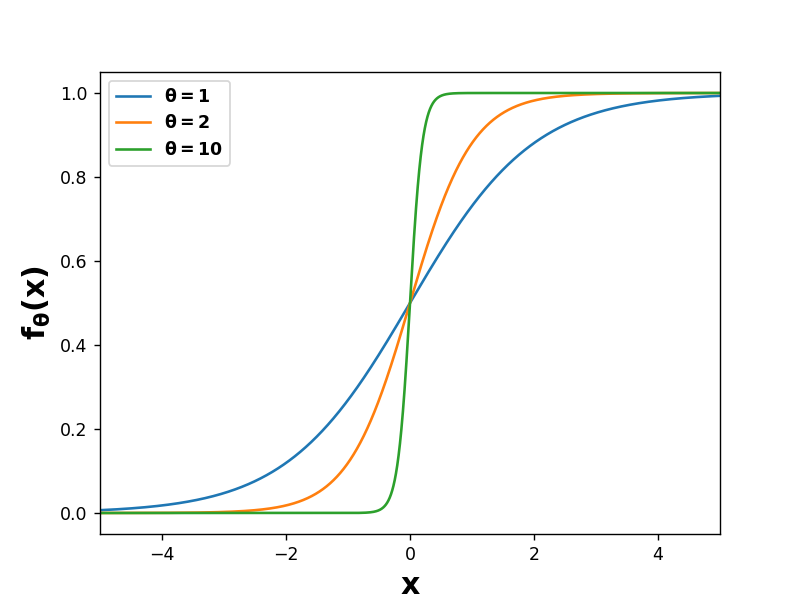

In [2]:
interval = -5, 5
f = lambda x, theta: 1 / (1 + np.exp(-theta * x))
xs = np.linspace(interval[0], interval[1], num=8000)

plt.figure()
plt.plot(xs, f(xs, 1), label="$\\bf{\\theta=1}$")
plt.plot(xs, f(xs, 2), label="$\\bf{\\theta=2}$")
plt.plot(xs, f(xs, 10), label="$\\bf{\\theta=10}$")

plt.xlim([interval[0], interval[1]])
plt.xlabel("$\\bf{x}$", fontsize='xx-large')
plt.ylabel("$\\bf{f_{\\theta}(x)}$", fontsize='xx-large')

plt.legend()
plt.draw()


---
---
---


### 1. Generate training data:
Create a vector with n = 7 evenly spaced points in the interval [−5, 5]. For each point xi in this vector, compute yi = fθ(xi). You should now have 7 pairs (xi, yi). Make a nice tablewith the seven input/output pairs.


In [3]:
def f(x, θ=1):
    return 1/(1 + math.exp(-θ*x))

In [4]:
x = np.linspace(-5,5,7)
y=[]
for i in x:
    y.append(f(i)) 

for i in range(len(x)):
    print("Point {:<3}| {:<23}| {:<23}".format(i, x[i], y[i]))
    i += 1


Point 0  | -5.0                   | 0.0066928509242848554  
Point 1  | -3.333333333333333     | 0.03444519566621118    
Point 2  | -1.6666666666666665    | 0.15886910488091516    
Point 3  | 0.0                    | 0.5                    
Point 4  | 1.666666666666667      | 0.8411308951190849     
Point 5  | 3.333333333333334      | 0.9655548043337889     
Point 6  | 5.0                    | 0.9933071490757153     


### 2. Train the model: 
Construct the Vandermonde system and solve for the coefficients of the unique degree-6 interpolating polynomial p6(x). Make a nice table of the 7 coefficients. And make a plot showing both fθ(x) and p6(x) over the domain [−5, 5]. Does this look like a good approximation? Explain your assessment.



In [5]:
#https://numpy.org/doc/stable/reference/generated/numpy.vander.html
#Construct the Vandermonde system
vanderMatrix= np.vander(x, increasing=True) #increasing true so coeff for x^6 is last 

#solve for the coefficients
coeff = np.linalg.solve(vanderMatrix, y)

#make a table of the 7 coefficients 
for i in range(len(coeff)):
    print("Coeff {:3}| {:25}| ".format(i, coeff[i]))
    i += 1

Coeff   0|                       0.5| 
Coeff   1|       0.23308408380860865| 
Coeff   2|   -1.1130791519360287e-16| 
Coeff   3|     -0.010832133158581564| 
Coeff   4|     1.442619596904655e-17| 
Coeff   5|    0.00021820907995371755| 
Coeff   6|   -3.9540246077329687e-19| 


$$p_6(x) = -3.9540246077329687e^{-19}x^6+0.00021820907995371755x^5+ 1.442619596904655e-17x^4-0.010832133158581564x^3 - 1.1130791519360287e^{-16}x^2 + 0.23308408380860865x + 0.5$$



<IPython.core.display.Javascript object>


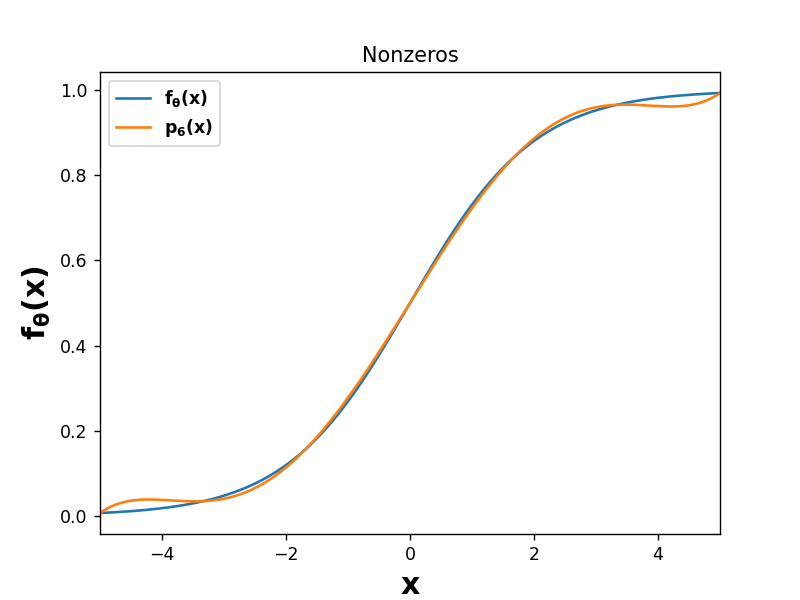

In [6]:
# make a plot showing both fθ(x) and p6(x) over the domain [−5, 5]. 
#Does this look like a good approximation? Explain
p= lambda x: -3.9540246077329687e-19*x**6+0.00021820907995371755*x**5+1.442619596904655e-17*x**4-0.010832133158581564*x**3-1.1130791519360287e-16*x**2+0.23308408380860865*x+0.5


import matplotlib.pyplot as plt
f = lambda x, theta: 1 / (1 + np.exp(-theta * x))

plt.figure()
plt.subplot(1,1,1)
plt.plot(xs,f(xs,1),label="$\\bf{f_{\\theta}(x)}$")
plt.plot(xs, p(xs),label="$\\bf{p_{6}(x)}$")
plt.title('Nonzeros')
plt.xlim([interval[0], interval[1]])
plt.xlabel("$\\bf{x}$", fontsize='xx-large')
plt.ylabel("$\\bf{f_{\\theta}(x)}$", fontsize='xx-large')
plt.legend()
plt.show()


This is a relatively good approximation, which is surprising because from lecutre I remember that if xi are equally then Vandermone is ill conditioned since interpolating is unstable at equally spaced points, so I was expecting this to be a poor approximation

### 3.Generate testing data: 
Create a new vector with 101 evenly spaced points in [−5, 5]. For each point x′i, compute y′i = fθ(x′i)

In [7]:
morex = np.linspace(-5,5,101)
y=[]
for i in morex:
    y.append(f(i,1)) 

#showing the first 5 and last 5 points 
for i in range(5):
    print("Point {:<3}| {:<23}| {:<23}".format(i, morex[i], y[i]))
    i += 1
print("...")
for e in range(96,101):
    print("Point {:<3}| {:<23}| {:<23}".format(e, morex[e], y[e]))
    e += 1

Point 0  | -5.0                   | 0.0066928509242848554  
Point 1  | -4.9                   | 0.007391541344281971   
Point 2  | -4.8                   | 0.008162571153159897   
Point 3  | -4.7                   | 0.009013298652847822   
Point 4  | -4.6                   | 0.009951801866904324   
...
Point 96 | 4.600000000000001      | 0.9900481981330957     
Point 97 | 4.700000000000001      | 0.990986701347152      
Point 98 | 4.800000000000001      | 0.9918374288468401     
Point 99 | 4.9                    | 0.9926084586557181     
Point 100| 5.0                    | 0.9933071490757153     


### 4.Compute the testing error: 

Compute and report the the absolute testing error: error = errorθ=1,n=7 = maximum



In [8]:
#compute p6(x')
yp=[]    
for i in morex:
    yp.append(p(i))
    
#find max error
error=0
for i in range(len(y)): 
    temperror=abs(y[i]-yp[i])
    if (error<temperror):
        error=temperror
print("The absolute testing error is :" , error)

The absolute testing error is : 0.025163852153648192


---
---
---
---

### 5. Repeat steps 1-4 with θ = 10. 
How does the error change? What does that tell you about the quality of the polynomial approximation for the two functions?

In [9]:
#1. Generate training data

theta10x = np.linspace(-5,5,7)
theta10y=[]
for i in x:
    theta10y.append(f(i,10)) 

for i in range(len(theta10x)):
    print("Point {:<3}| {:<23}| {:<23}".format(i, theta10x[i], theta10y[i]))
    i += 1


Point 0  | -5.0                   | 1.928749847963918e-22  
Point 1  | -3.333333333333333     | 3.338237795365011e-15  
Point 2  | -1.6666666666666665    | 5.777748185595394e-08  
Point 3  | 0.0                    | 0.5                    
Point 4  | 1.666666666666667      | 0.9999999422225181     
Point 5  | 3.333333333333334      | 0.9999999999999967     
Point 6  | 5.0                    | 1.0                    


In [10]:

#2. Train the model
vanderMatrix= np.vander(theta10x, increasing=True) #increasing true so coeff for x^6 is last 
#solve for the coefficients
theta10coeff = np.linalg.solve(vanderMatrix, theta10y)
#make a table of the 7 coefficients 
for i in range(len(coeff)):
    print("Coeff {:3}| {:25}| ".format(i, theta10coeff[i]))
    i += 1
    
ptheta10= lambda x: -9.55036237717536e-19*x**6+0.0006479998128009668*x**5+3.413443003923874e-17*x**4-0.026999993240034843*x**3-2.5646310240750854e-16*x**2+0.3699999480002668*x+0.4999999999999999


Coeff   0|        0.4999999999999999| 
Coeff   1|        0.3699999480002668| 
Coeff   2|   -2.5646310240750854e-16| 
Coeff   3|     -0.026999993240034843| 
Coeff   4|     3.413443003923874e-17| 
Coeff   5|     0.0006479998128009668| 
Coeff   6|     -9.55036237717536e-19| 


In [11]:
np.linalg.cond(vanderMatrix)

25066.919613708356

<IPython.core.display.Javascript object>


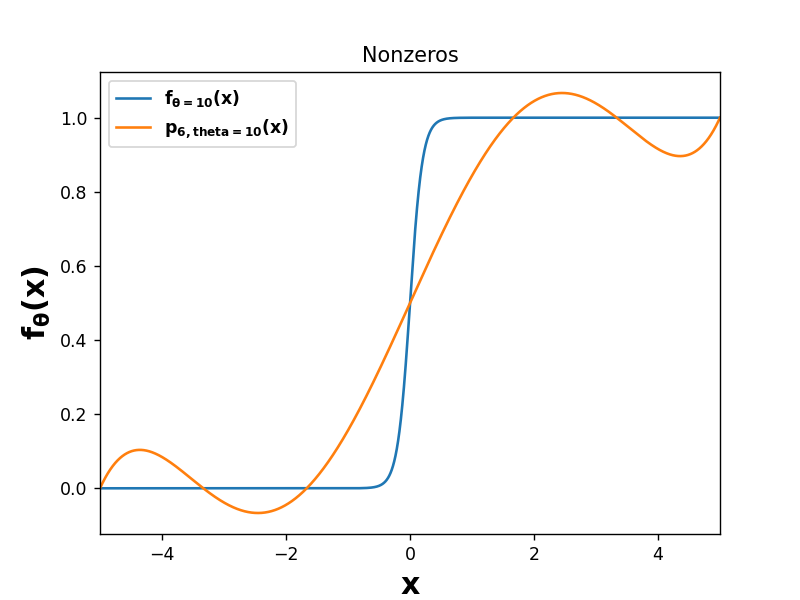

In [12]:

#graph 
import matplotlib.pyplot as plt
f = lambda x, theta: 1 / (1 + np.exp(-theta * x))

plt.figure()
plt.subplot(1,1,1)
plt.plot(xs,f(xs,10),label="$\\bf{f_{\\theta=10}(x)}$")
plt.plot(xs, ptheta10(xs),label="$\\bf{p_{6,theta=10}(x)}$")
plt.title('Nonzeros')
plt.xlim([interval[0], interval[1]])
plt.xlabel("$\\bf{x}$", fontsize='xx-large')
plt.ylabel("$\\bf{f_{\\theta}(x)}$", fontsize='xx-large')
plt.legend()
plt.show()

$$ p_{6, theta=10}(x) = -9.55036237717536e^{-19}x^6+0.0006479998128009668x^5+ 3.413443003923874e^{-17}x^4-0.026999993240034843x^3 - 2.5646310240750854e^{-16}x^2 + 0.3699999480002668x + 0.4999999999999999$$

In [13]:
## 3.Generate testing data: 
#Create a new vector with 101 evenly spaced points in [−5, 5]
morex = np.linspace(-5,5,101)

##For each point x′i, compute y′i = fθ(x′i)
y=[]
for i in morex:
    y.append(f(i,10)) 

#showing the first 5 and last 5 points 
for i in range(5):
    print("Point {:<3}| {:<23}| {:<23}".format(i, morex[i], y[i]))
    i += 1
print("...")
for e in range(96,101):
    print("Point {:<3}| {:<23}| {:<23}".format(e, morex[e], y[e]))
    e += 1

Point 0  | -5.0                   | 1.928749847963918e-22  
Point 1  | -4.9                   | 5.242885663363464e-22  
Point 2  | -4.8                   | 1.4251640827409352e-21 
Point 3  | -4.7                   | 3.873997628687187e-21  
Point 4  | -4.6                   | 1.0530617357553813e-20 
...
Point 96 | 4.600000000000001      | 1.0                    
Point 97 | 4.700000000000001      | 1.0                    
Point 98 | 4.800000000000001      | 1.0                    
Point 99 | 4.9                    | 1.0                    
Point 100| 5.0                    | 1.0                    


In [14]:
#compute p6(x')
yp=[]    
for i in morex:
    yp.append(ptheta10(i))
    
#find max error
error=0
for i in range(len(y)): 
    temperror=abs(y[i]-yp[i])
    if (error<temperror):
        error=temperror
print("The absolute testing error is :" , error)

The absolute testing error is : 0.3423015676002892



Thus the error is about 10x larger when theta=10 vs. when theta=1. 

After seeing that the approximation is not as good, I was expecting this error to be larger, however I am still unsure why. I could not find anything online or in the book related to this, which makes me even more curious.

I originally hypothesized that the approximation and error would be near since we are using equally spaced points in both cases. I expected both to be equally ill conditioned, which was true, however this does not help explain why the approximation is not as good and error is higher for theta==10|


## References

- Lectures were informative although brief for this section, so I relied primarily on my best friend, the numpy docs and google

- https://numpy.org/doc/stable/index.html

- https://sites.google.com/site/sscnumericalanalysis/interpolation-and-polynomial-approximation/vandermonde-matrix

- https://cu-numcomp.github.io/spring22/slides/2022-03-02-interpolation.html#vandermonde-matrices-can-be-ill-conditioned

- https://www.cs.purdue.edu/homes/wxg/selected_works/section_01/118.pdf